<a href="https://colab.research.google.com/github/Sirfowahid/Bangla_Contextual_Analysis/blob/main/Brain_Storming_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00


In [ ]:
!pip install normalizer

  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.2.1-py3-none-any.whl size=3739 sha256=2e6b65e204836be67517c7424798c0efb31617f79ddf04b3e5b4184029d4cad2
  Stored in directory: /root/.cache/pip/wheels/e6/2d/f0/8d18562e55088a73a3afb58804a6fc36d66a20adbe4991ed6d
Successfully built normalizer


In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-mhu7mnmu
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-mhu7mnmu
  Resolved https://github.com/csebuetnlp/normalizer to commit d80c3c484e1b80268f2b2dfaf7557fe65e34f321
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6860 sha256=1b1c7c666aa0d5e6815365c0b3836906c4f461bc204616c8b120a0d162dfb1dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-2fayewle/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=b61ab736fc8eb6b167079d81d60506c37f398d25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projects/02. Contextual Analysis With Book Review Dataset/Book review.xlsx')

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', '1_Name', 'Writer_Name', 'Category', 'Rating',
       'Review', 'Site', 'sentiment', 'label', 'Correct Label',
       'Comment About'],
      dtype='object')

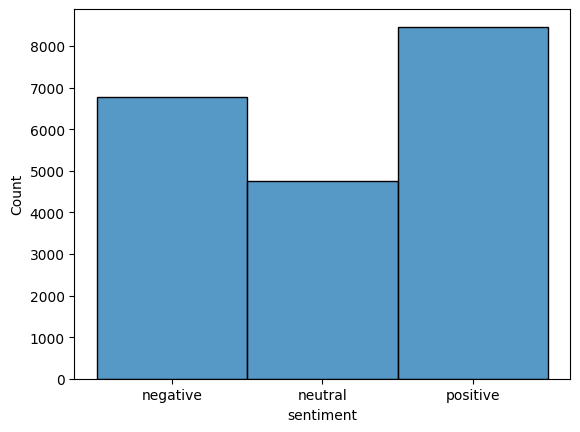

In [ ]:
sns.histplot(df['sentiment'])
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModel

bnbert_tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
text = "আমি বাংলায় গান গাই।"
bnbert_tokenizer.tokenize(text)

['আমি', 'বাংলা', '##য', 'গান', 'গাই', '।']

In [ ]:
from transformers import BertForMaskedLM, BertTokenizer, pipeline

model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
nlp = pipeline('fill-mask', model=model, tokenizer=tokenizer)
for pred in nlp(f"আমি বাংলায় {nlp.tokenizer.mask_token} গাই।"):
  print(pred)


Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.13404664397239685, 'token': 2552, 'token_str': 'গান', 'sequence': 'আমি বাংলায গান গাই ।'}
{'score': 0.0613858662545681, 'token': 2058, 'token_str': '##ও', 'sequence': 'আমি বাংলাযও গাই ।'}
{'score': 0.04723009094595909, 'token': 4122, 'token_str': 'সাহিত্য', 'sequence': 'আমি বাংলায সাহিত্য গাই ।'}
{'score': 0.04314076155424118, 'token': 4459, 'token_str': 'কবিতা', 'sequence': 'আমি বাংলায কবিতা গাই ।'}
{'score': 0.013253448531031609, 'token': 3264, 'token_str': 'শব্দ', 'sequence': 'আমি বাংলায শব্দ গাই ।'}


In [ ]:
from transformers import AutoModelForPreTraining, AutoTokenizer
from normalizer import normalize
import torch

model = AutoModelForPreTraining.from_pretrained("csebuetnlp/banglabert")
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")

original_sentence = "আমি কৃতজ্ঞ কারণ আপনি আমার জন্য অনেক কিছু করেছেন।"
fake_sentence = "আমি হতাশ কারণ আপনি আমার জন্য অনেক কিছু করেছেন।"
fake_sentence = normalize(fake_sentence)

fake_tokens = tokenizer.tokenize(fake_sentence)
fake_inputs = tokenizer.encode(fake_sentence, return_tensors="pt")
discriminator_outputs = model(fake_inputs).logits
predictions = torch.round((torch.sign(discriminator_outputs) + 1) / 2)

[print("%7s" % token, end="") for token in fake_tokens]
print("\n" + "-" * 50)
[print("%7s" % int(prediction), end="") for prediction in predictions.squeeze().tolist()[1:-1]]
print("\n" + "-" * 50)


    আমি   হতাশ   কারণ   আপনি   আমার   জন্য   অনেক   কিছু করেছেন      ।
--------------------------------------------------
      0      1      0      0      0      0      0      0      0      0
--------------------------------------------------
